In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np
from __future__ import division
import math

/Users/scott/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


specific data does not have an unique p-value associated with it,
due to dependence on stopping/testing researcher intention,
logic of significance testing

In [2]:
true_p = .7
true_variance = true_p * (1-true_p)
sample_size = 30

use CLT to generate sampling distribution based upon sample size of 30

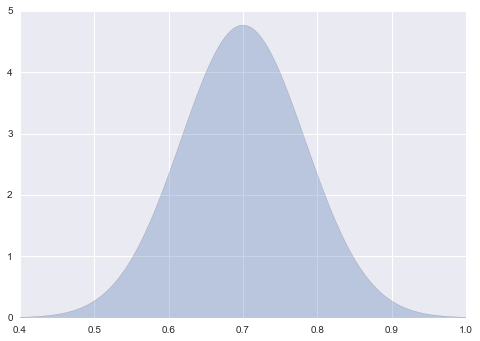

In [3]:
fig, ax = plt.subplots()
x = np.linspace(0.4, 1, num=500)
sampling_dist = stats.norm.pdf(x, loc=true_p, scale=math.sqrt(true_variance/sample_size))
ax.fill(x, sampling_dist, alpha=.3)

In [4]:
1-stats.norm.cdf(.85, loc=true_p, scale=math.sqrt(true_variance/sample_size))

0.036499022715057783

draw a sample to use in calculating a p-value. one sided or two sided p-value? prob stick to one sided to KISS

In [50]:
test_sample = stats.bernoulli.rvs(true_p, size=sample_size)
test_sample_mean = np.sum(test_sample)/sample_size
p_value = 1-stats.norm.cdf(test_sample_mean, loc=true_p, scale=math.sqrt(true_variance/sample_size))

add the 5% critical value in graph?

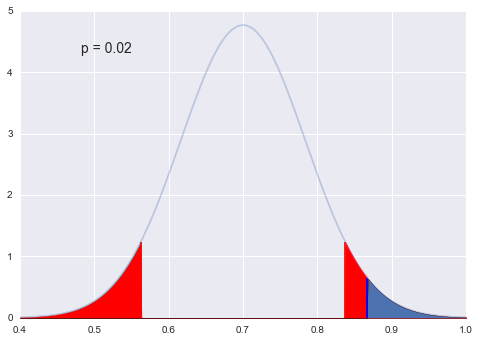

In [51]:
fig, ax = plt.subplots()
x = np.linspace(0.4, 1, num=500)
sampling_dist = stats.norm.pdf(x, loc=true_p, scale=math.sqrt(true_variance/sample_size))
lower_crit_value = stats.norm.ppf(.05,loc=true_p, scale=math.sqrt(true_variance/sample_size))
upper_crit_value = stats.norm.ppf(.95,loc=true_p, scale=math.sqrt(true_variance/sample_size))

ax.plot(x, sampling_dist, alpha=.3)
lower_crit_value_height = stats.norm.pdf(lower_crit_value, loc=true_p, scale=math.sqrt(true_variance/sample_size))
ax.vlines(lower_crit_value, 0, lower_crit_value_height, color='red')
ax.fill_between(x, 0, sampling_dist * (x < lower_crit_value), color='red')

upper_crit_value_height = stats.norm.pdf(upper_crit_value, loc=true_p, scale=math.sqrt(true_variance/sample_size))
ax.vlines(upper_crit_value, 0, upper_crit_value_height, color='red')
ax.fill_between(x, 0, sampling_dist * (x > upper_crit_value), color='red')

test_sample_mean_height = stats.norm.pdf(test_sample_mean, loc=true_p, scale=math.sqrt(true_variance/sample_size))
ax.vlines(test_sample_mean, 0, test_sample_mean_height, color='blue')
ax.fill_between(x, 0, sampling_dist * (x > test_sample_mean))

ax.text(.55, 4.5, "p = {0:.2f}".format(p_value), ha='right', va='top', size=14);

use CLT and different sampling plan to get different sampling distribution. across the different sampling distributions and researcher intentions, need to know what researcher was thinking, show that collected data can have differnt p-values so no unique p-value associated with specific data

then discuss logic of significance test. probabilistic modus tollens. same post

significance test doesn't require specifying a specific alternative hypothesis, not like hypothesis testing